# Import Libraries and Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [13]:
# Reading csv file
data = pd.read_csv('USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Exploratory Data Analysis

In [3]:
data.info()#print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# Checking null values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [54]:
data.describe()# Generate descriptive statistics summarizing central tendency, dispersion, and shape of dataset's distribution.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [15]:
# Data Claening
df = pd.DataFrame()
df['Income'] = data['Avg. Area Income'].round(2)# Round 'Avg. Area Income' to 2 decimal places and store in 'Income'.
df['House Age'] = data['Avg. Area House Age'].apply(int)# Converting 'Avg. Area House Age' to integers and adding it to 'df' as 'House Age'.
df['No. of Rooms'] = data['Avg. Area Number of Rooms'].apply(int)# Converting 'Avg. Area Number of Rooms' to integers and adding it to 'df' as 'No. of Rooms'.
df['No. of Bedrooms'] = data['Avg. Area Number of Bedrooms'].apply(int)# Converting 'Avg. Area Number of Bedrooms' to integers and adding it to 'df' as 'No. of Bedrooms'.
df['Population'] = data['Area Population'].apply(int)# Converting 'Area Population' to integers and adding it to 'df' as 'Population'.
df['Price'] = data['Price'].apply(int)# Converting 'Price' to integers and adding it to 'df' as 'Price'.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Price', ylabel='Density'>

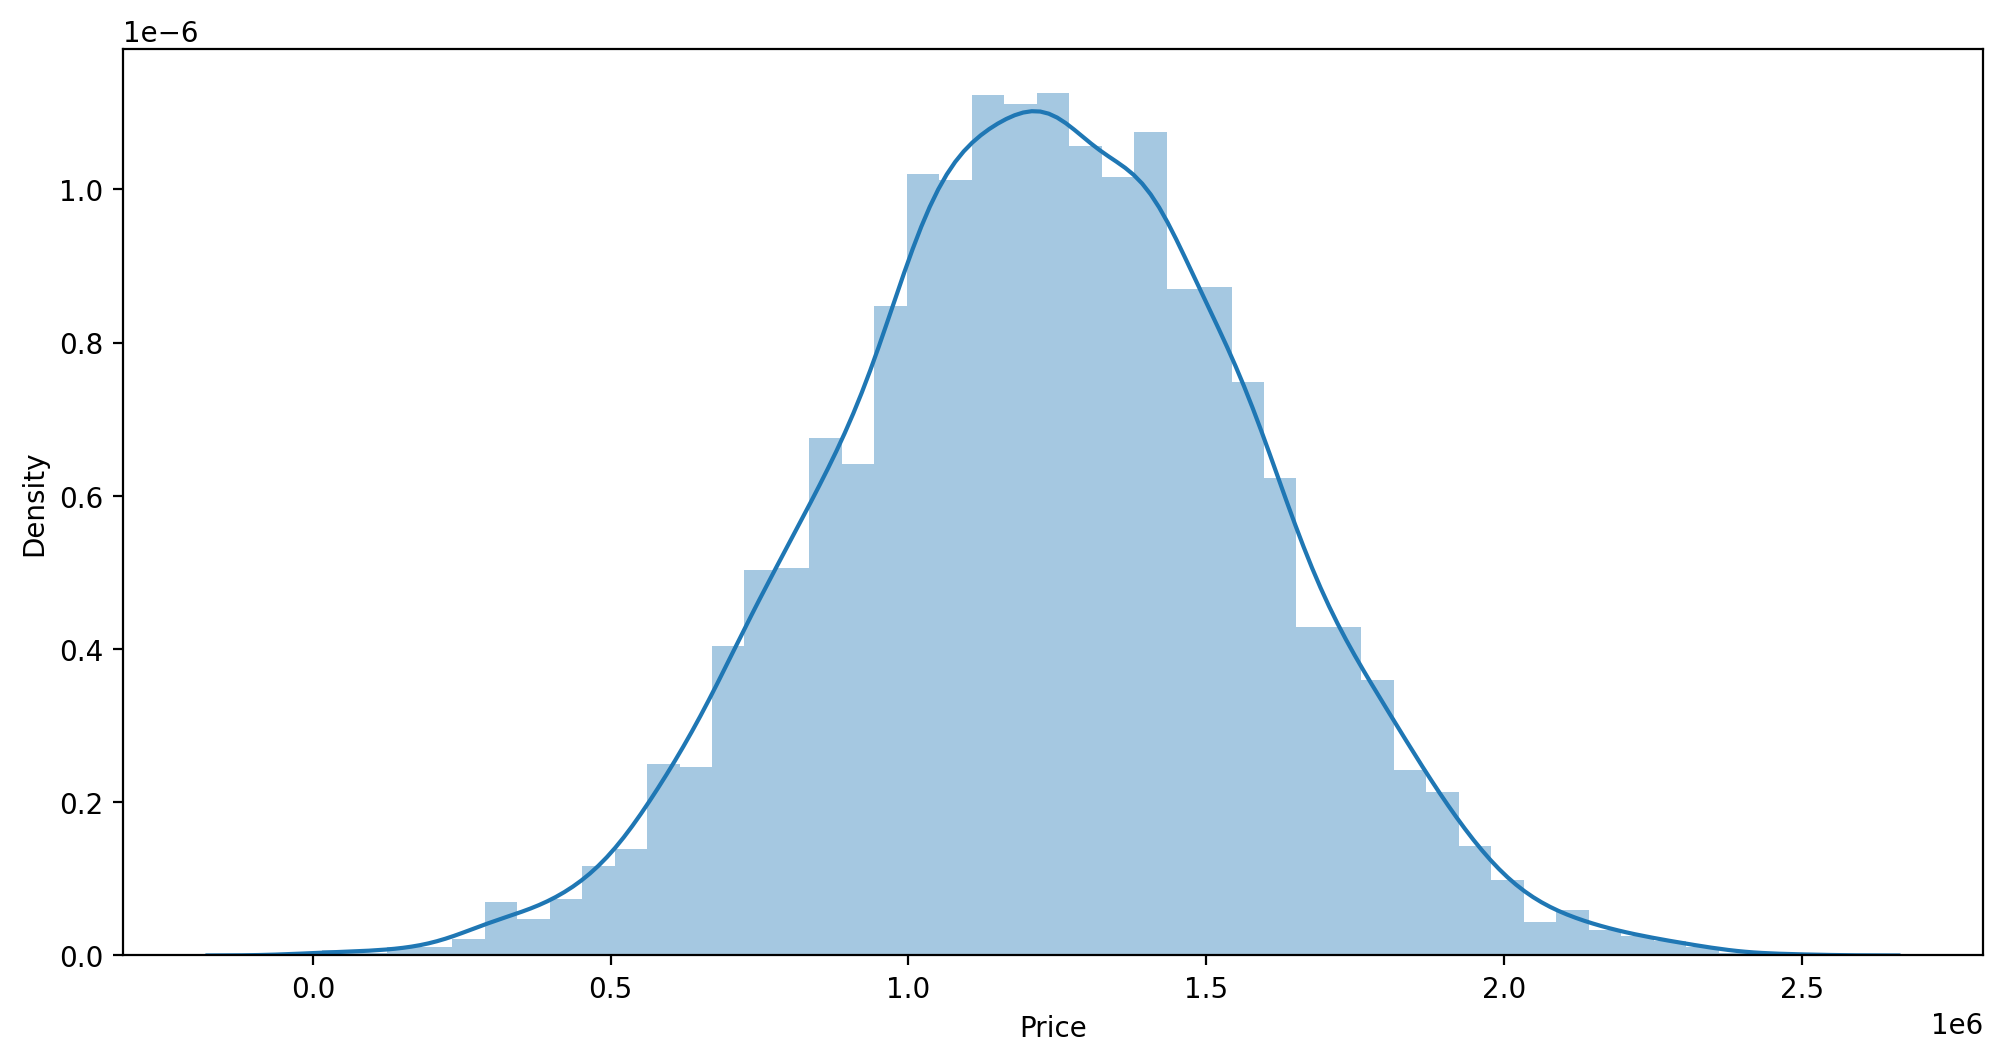

In [14]:
# Price plot
plt.figure(figsize = (12, 6), dpi = 200)
sns.distplot(data.Price)

<Axes: xlabel='Income', ylabel='Price'>

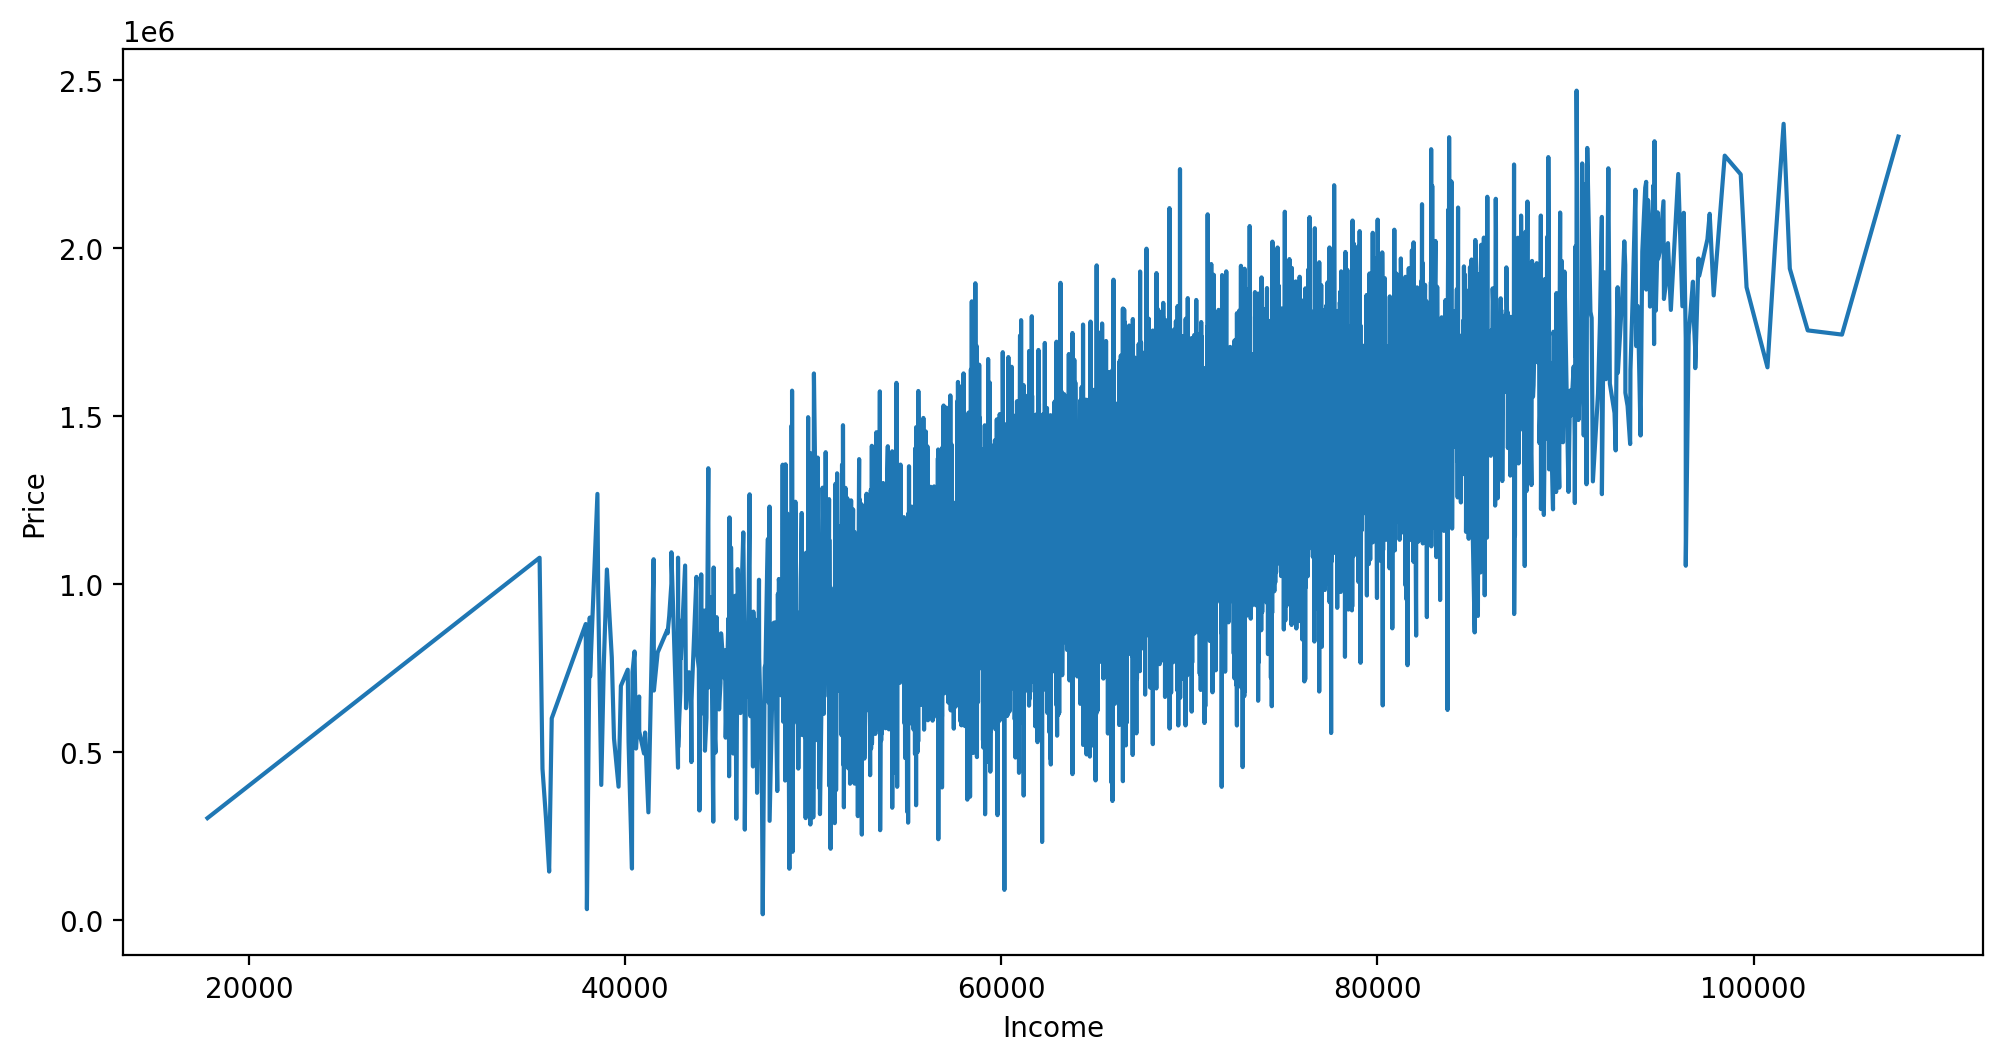

In [59]:
# Price wrt Income
plt.figure(figsize = (12, 6), dpi = 200)
sns.lineplot(x = 'Income', y = 'Price', data = df)

<Axes: xlabel='House Age', ylabel='Price'>

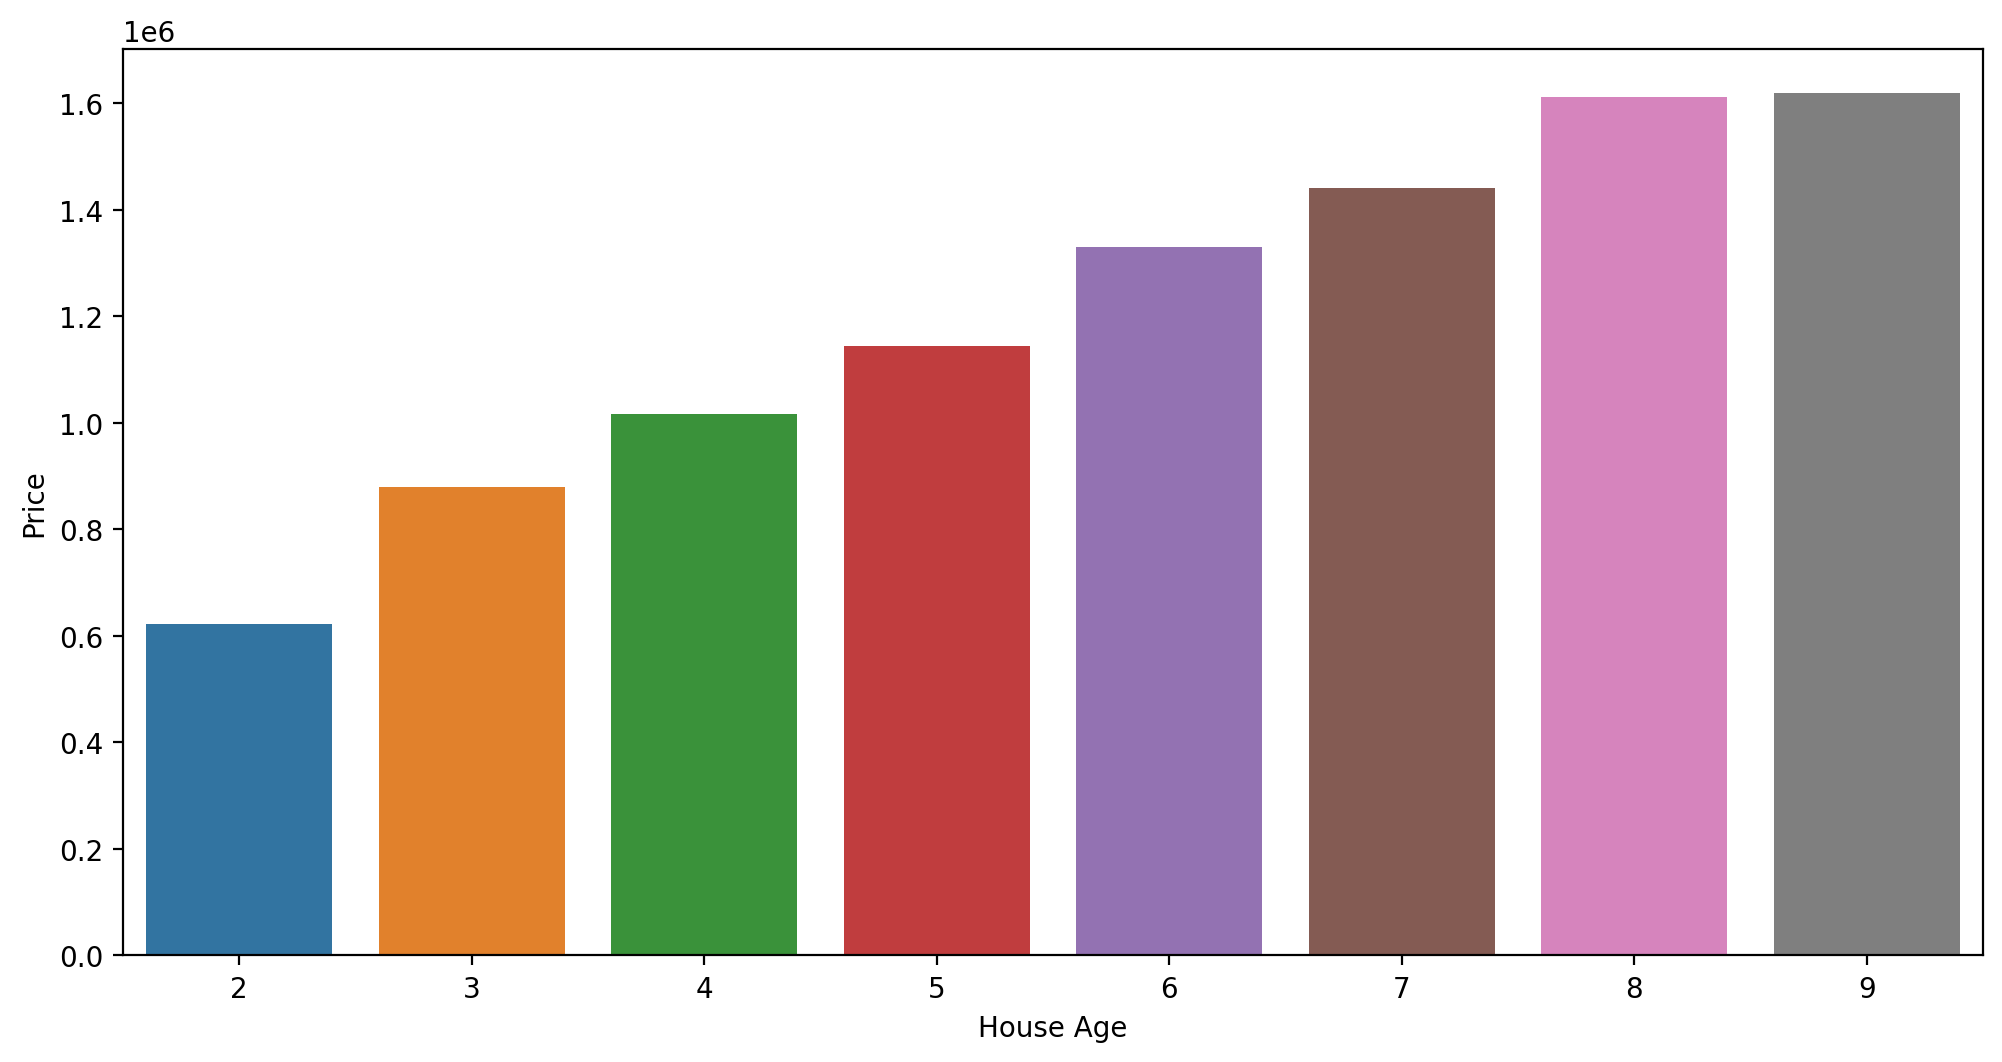

In [19]:
# Price wrt House Age
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

<Axes: xlabel='No. of Rooms', ylabel='Price'>

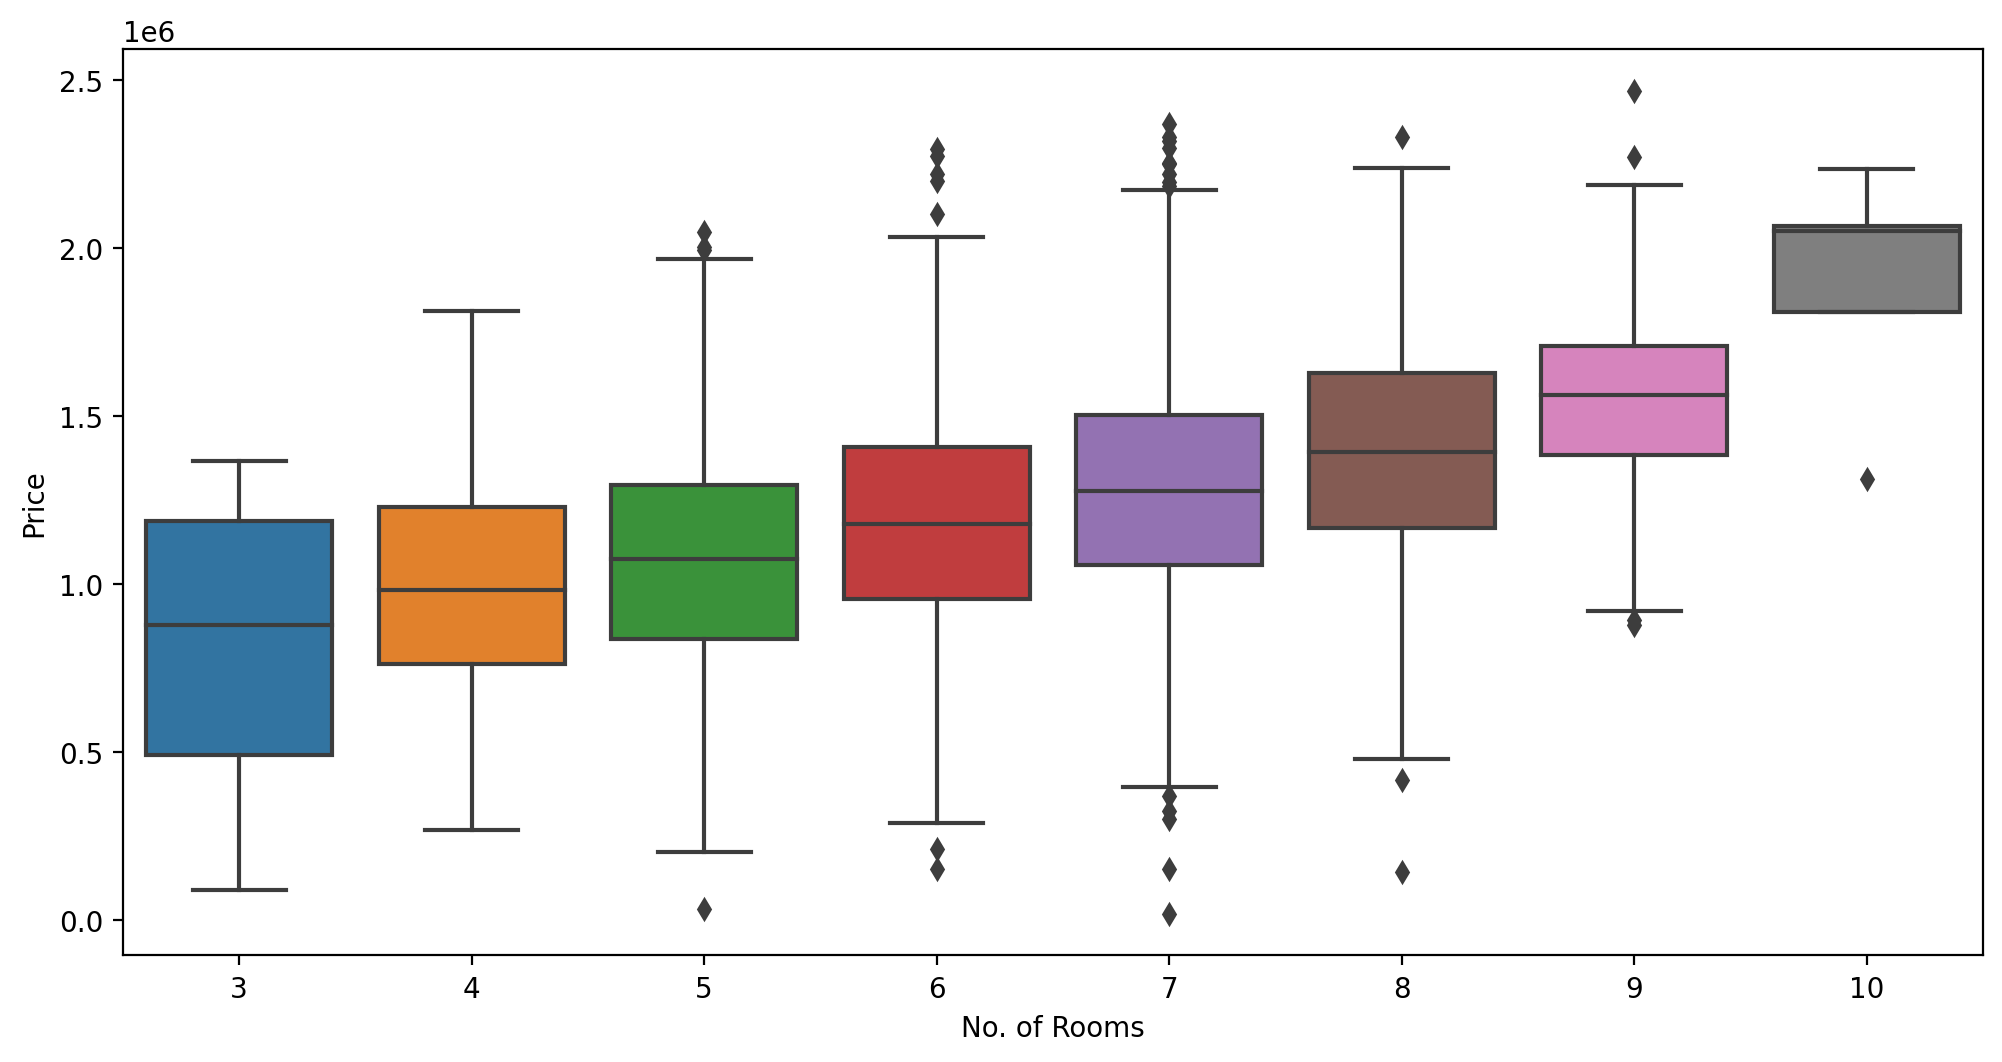

In [51]:
# Price wrt No. of Rooms
plt.figure(figsize = (12, 6), dpi = 200)
sns.boxplot(x = 'No. of Rooms', y = 'Price', data = df)

<Axes: xlabel='No. of Bedrooms', ylabel='Price'>

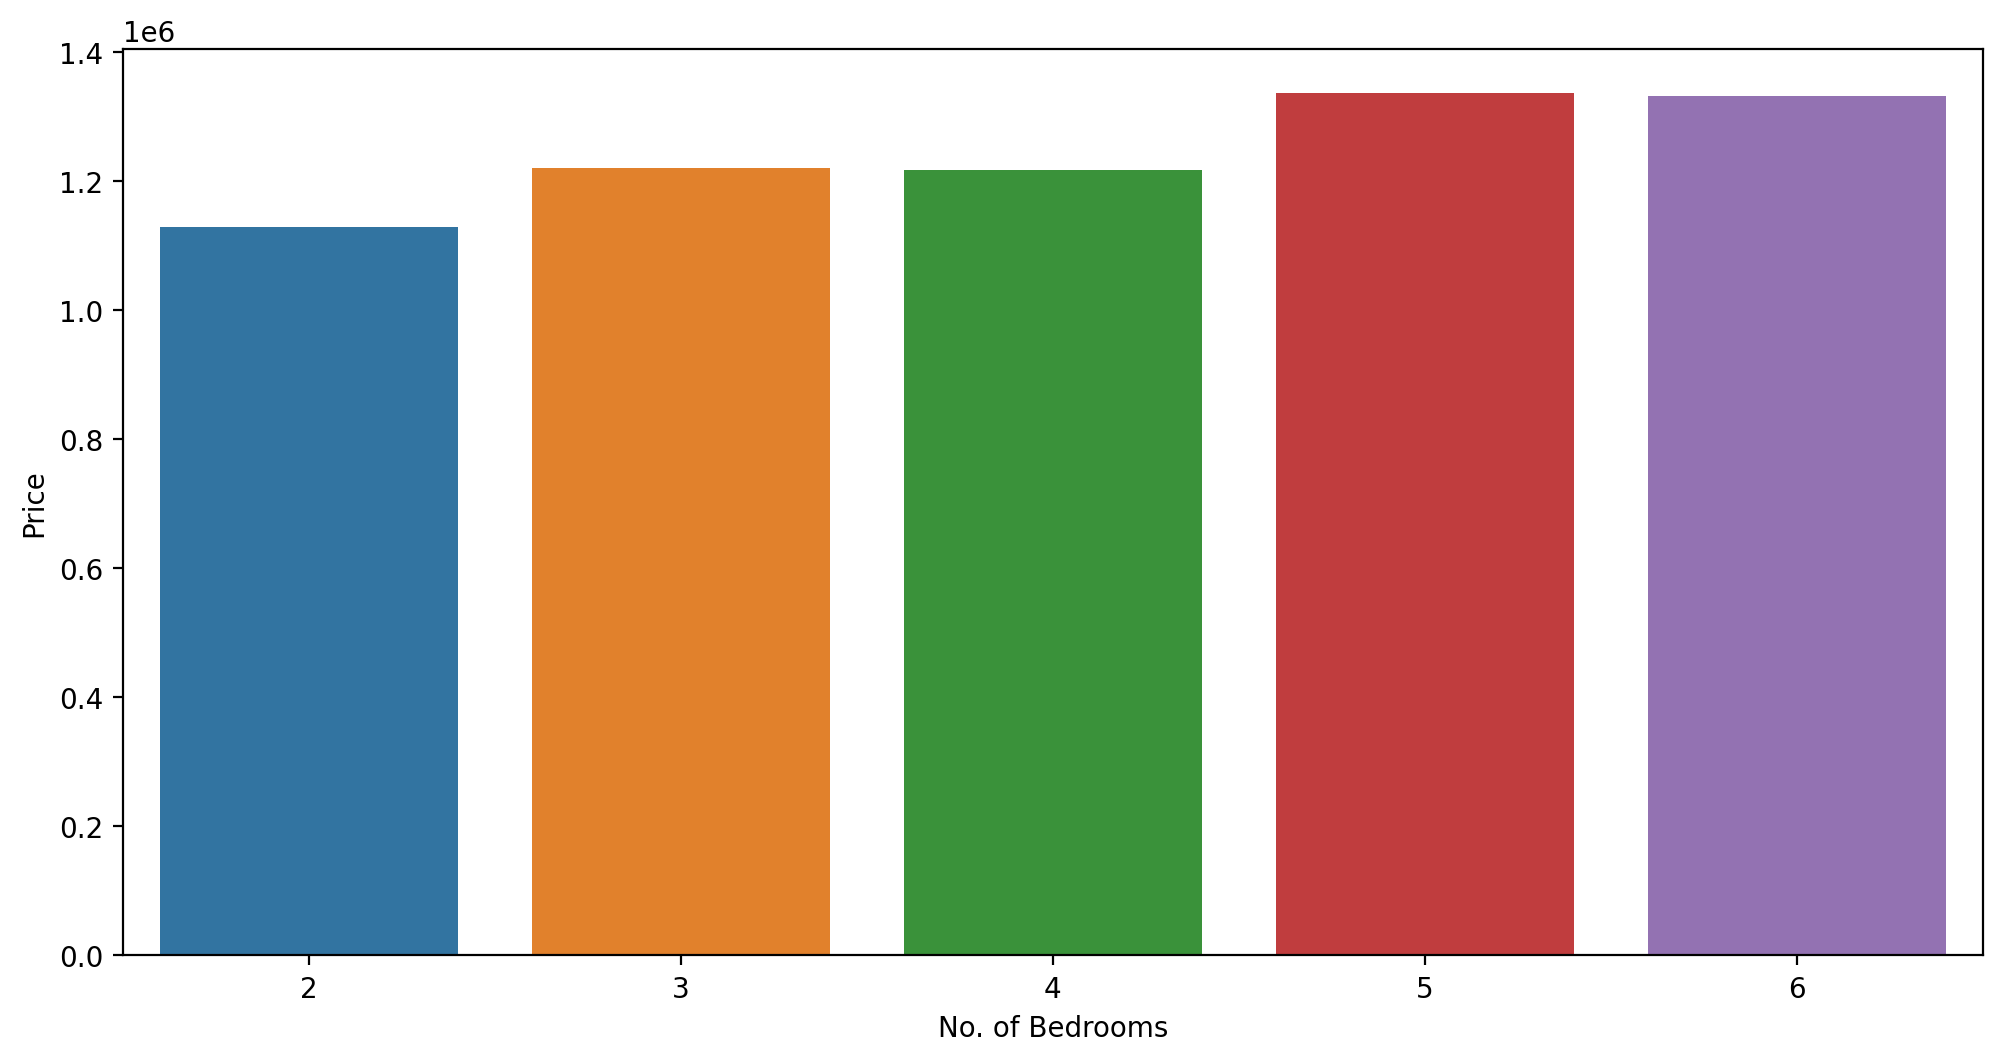

In [23]:
# Price wrt No. of Bedrooms
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'No. of Bedrooms', y = 'Price', data = df, ci = None)

<Axes: xlabel='Population', ylabel='Price'>

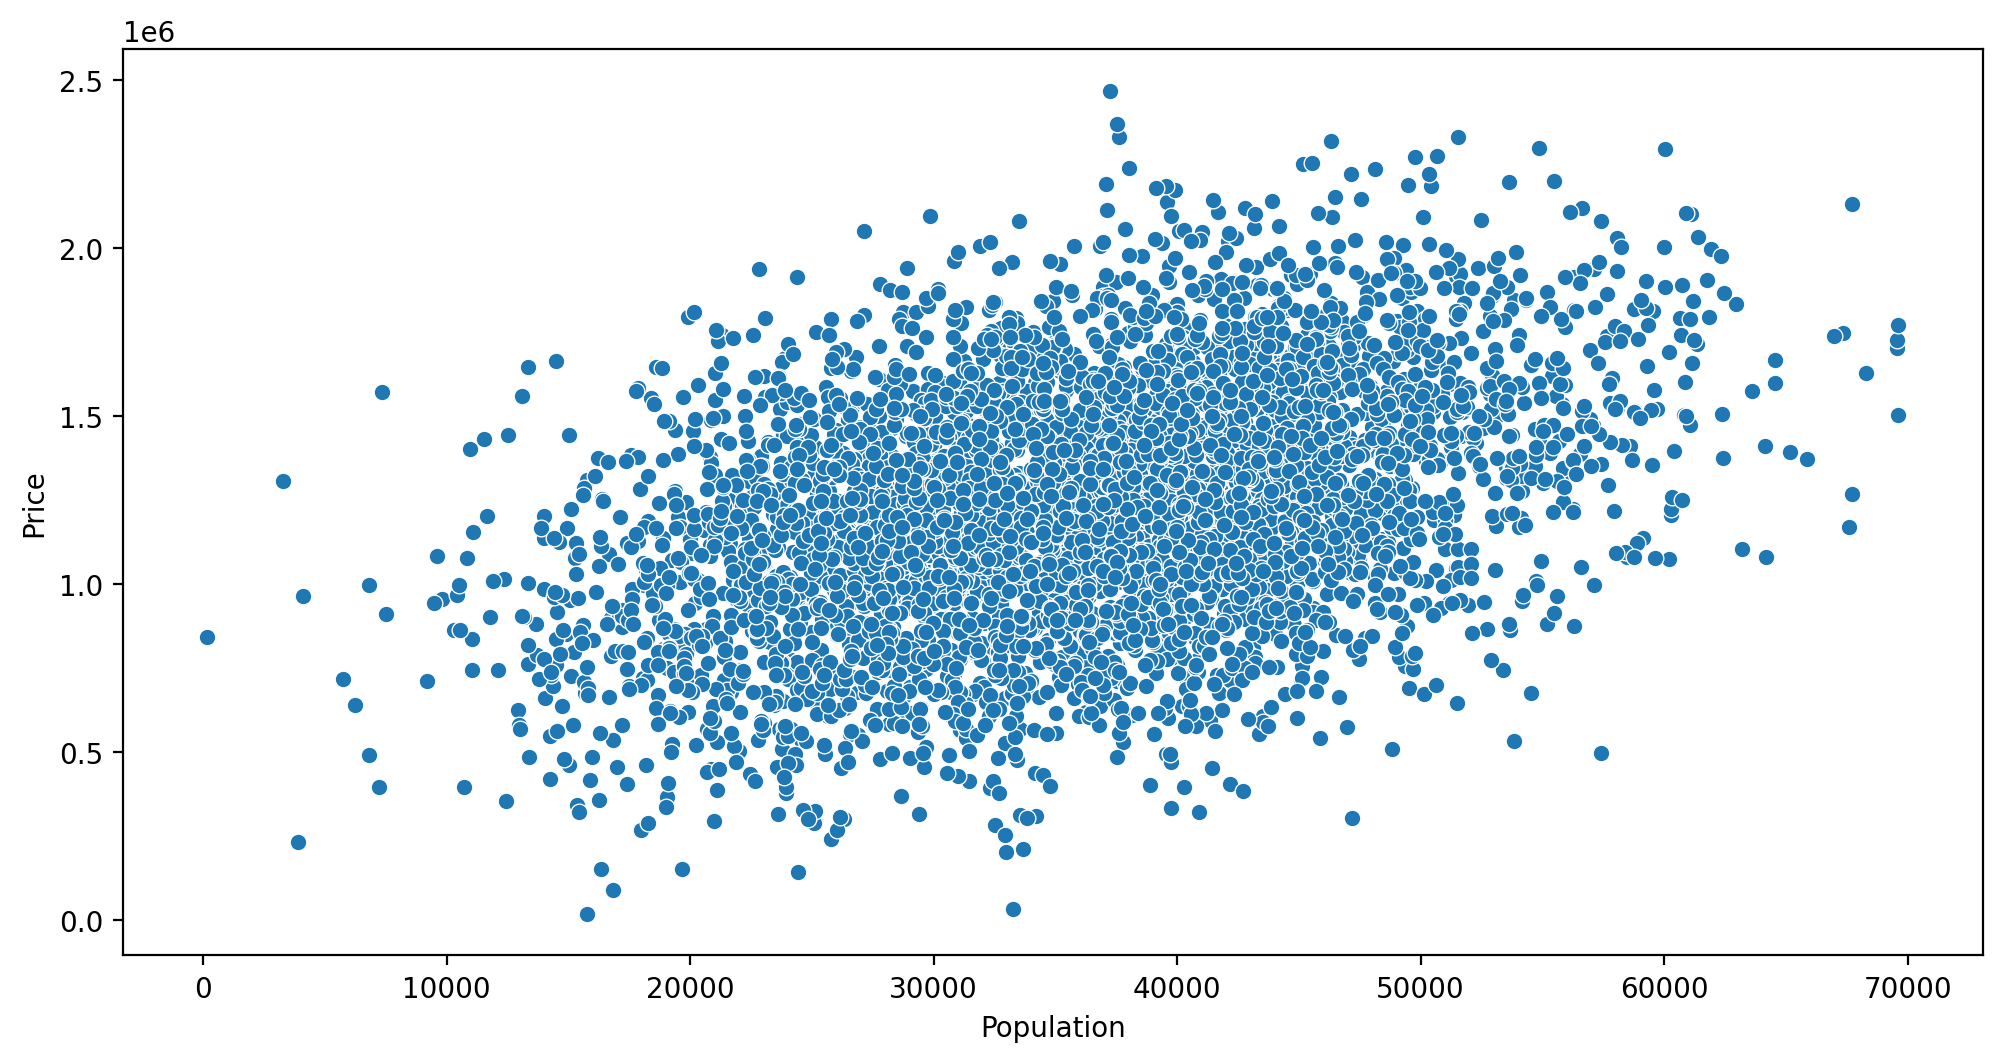

In [24]:
# Price wrt Population
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot(x = 'Population', y = 'Price', data = df)

<Axes: >

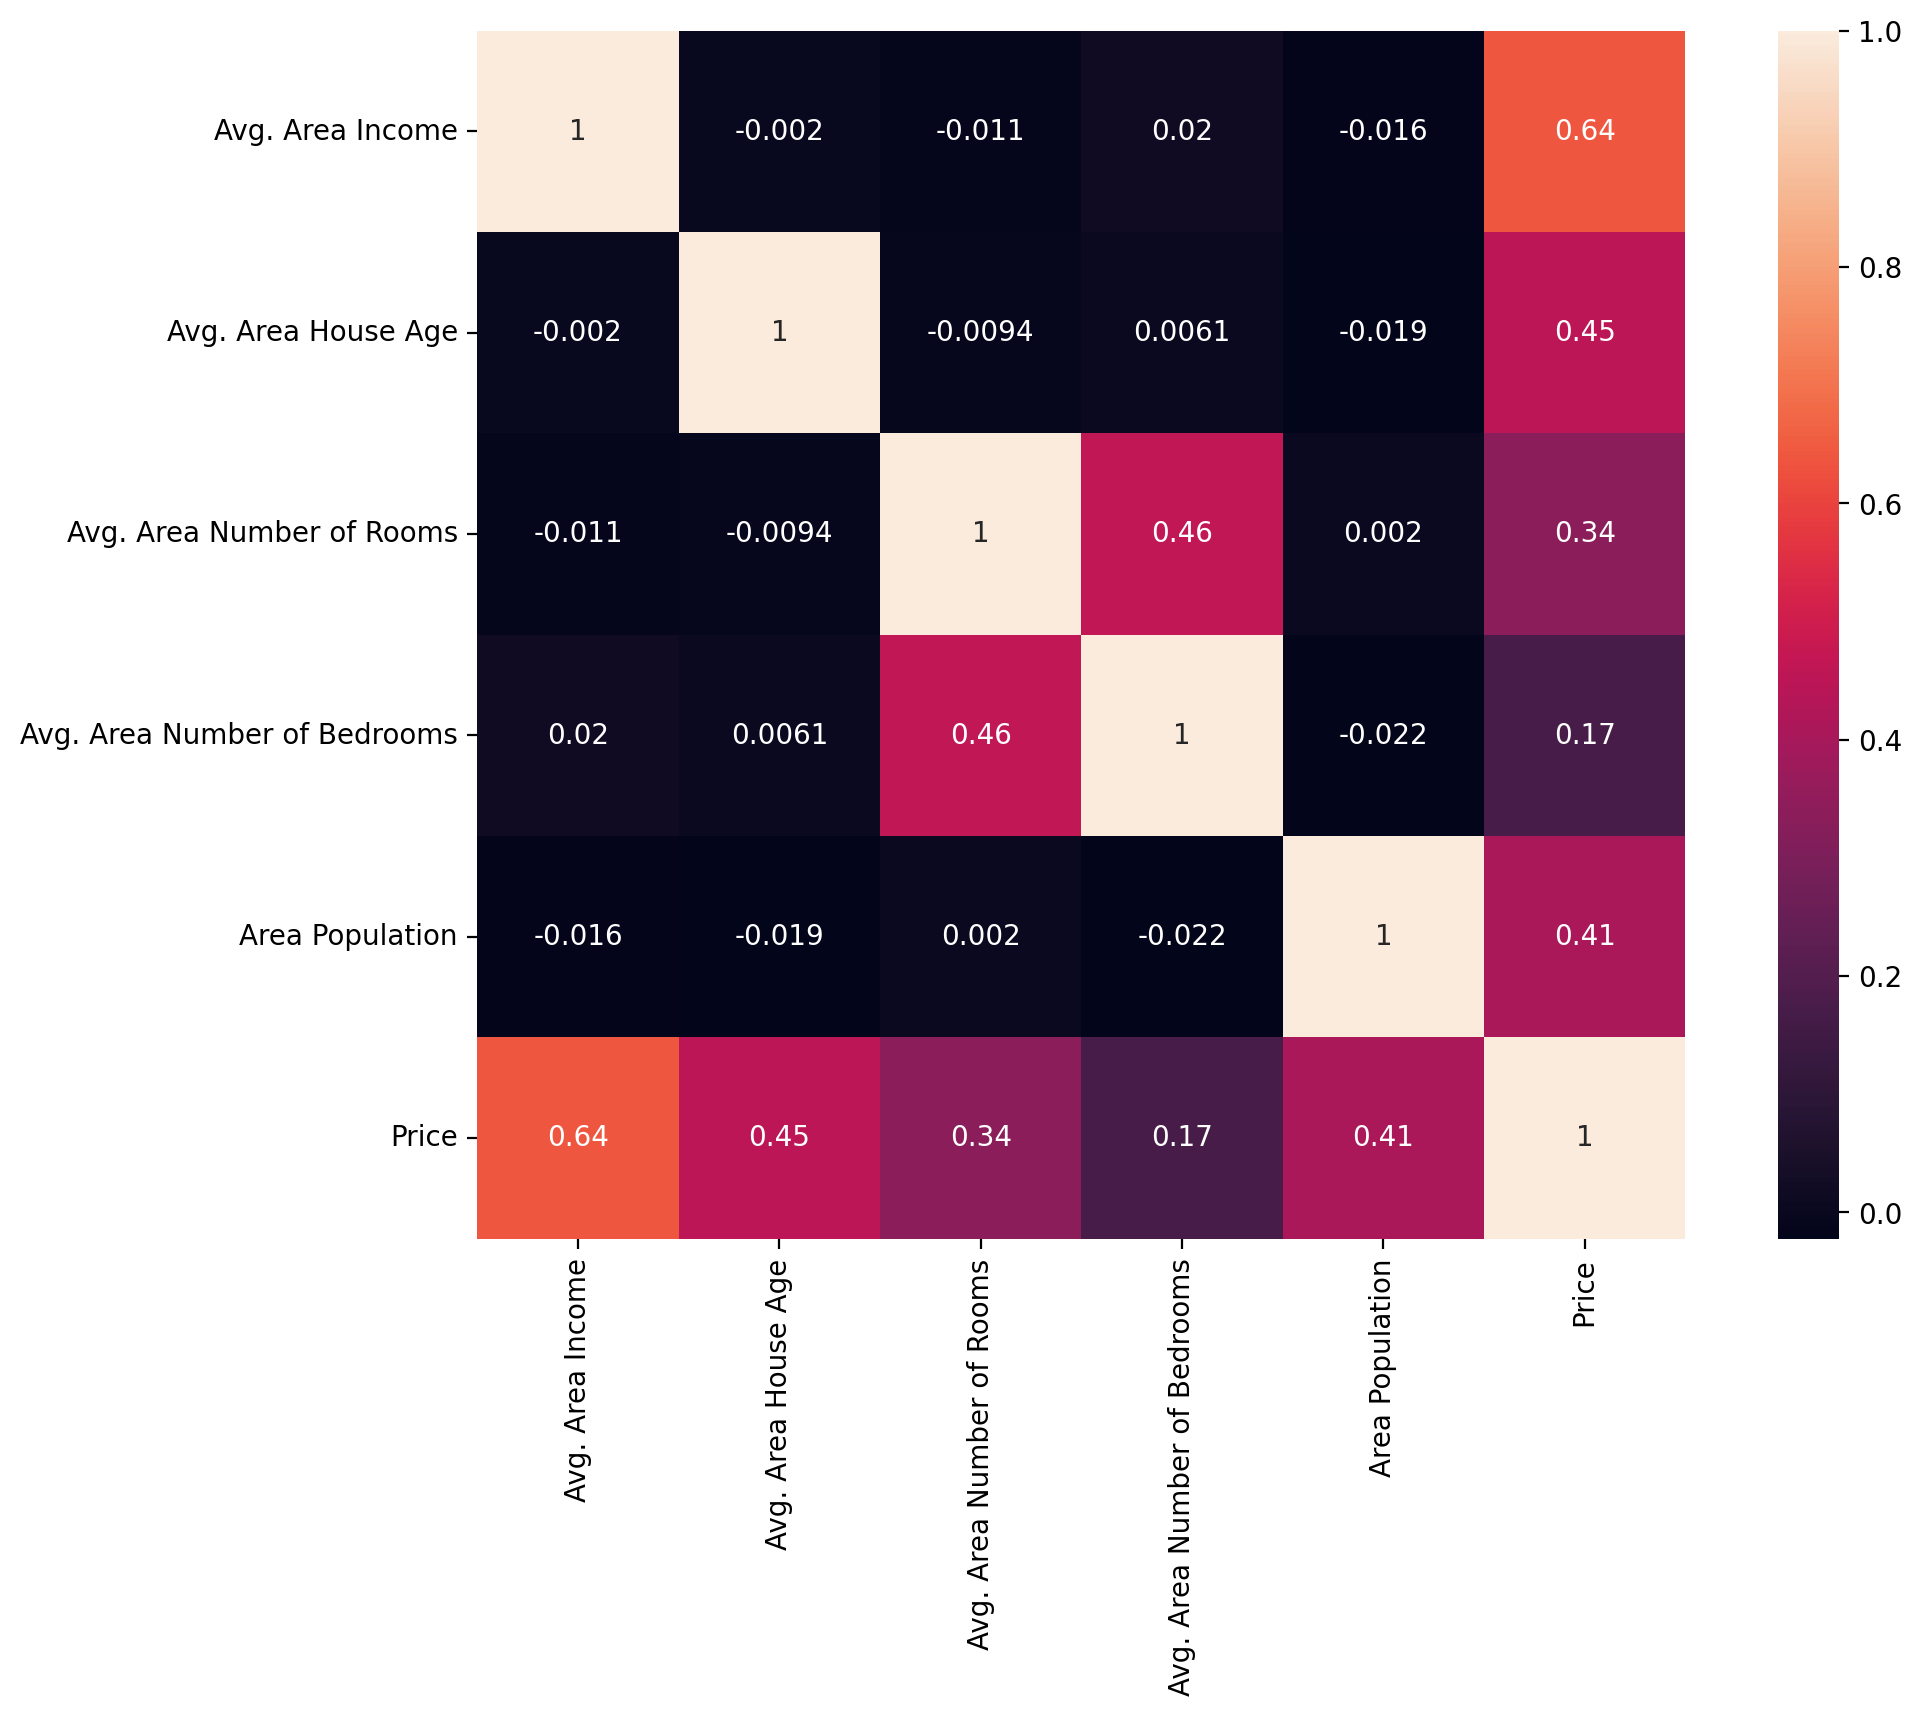

In [25]:
#Heatmap showing correlation
plt.figure(figsize = (12, 8), dpi = 200)
sns.heatmap(data.corr(), annot = True, square = True)

# Setting Target and Variable and Train Test Split

In [26]:
# Selecting features and target variable
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

In [27]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random FOrest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model to the scaled training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Random Forest Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the best model on the scaled test data
predictions = best_rf.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Best Parameters:', grid_search.best_params_)

Mean Squared Error: 14308544382.476547
R-squared: 0.8837010564891862
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [30]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64

In [31]:
predictions

array([1307087.4879016 , 1244017.24023052, 1275777.07066763,
       1214577.43025003, 1192457.00400717, 1539732.09473113,
       1054950.89065146,  844769.54643916,  872790.21628404,
       1398049.16235094,  661831.05833939, 1301529.31323965,
       1016518.46975801, 1670219.73633286, 1298000.32853234,
       1071816.48763003, 1372181.62763932, 1110194.55030423,
        785093.52551906,  922088.97580721, 1104112.97959792,
       1045094.09149729, 1510914.43292827, 1324413.85967803,
       1569955.52697379, 1139994.3653257 , 1075623.0061941 ,
        990756.03185819,  992439.03122436, 1696750.63264082,
       1318006.76285044, 1626187.933248  , 1426841.27819474,
       1238804.35095047, 1504419.18829708, 1699266.34457266,
       1516403.58037732,  823754.72489952, 1718965.96252973,
       1132175.57113273, 1497435.86874145,  934566.08165603,
       1404337.49856037,  833930.84531217, 1185517.91615953,
       1137422.32691787, 1322326.03358801, 1328598.39291966,
       1528798.31010231,

# XGBoost Regressor

In [32]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# XGBoost Regressor Model Evaluation

In [33]:
# Make predictions using the best model
predictions = best_xgb.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Best Parameters:', grid_search.best_params_)

Mean Squared Error: 11064311070.076391
R-squared: 0.9100699796059779
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


In [60]:
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 107444.14620312591
Mean Absolute Error: 85927.5765781728


# Elastic Net Model

In [43]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Elastic Net model
elastic_net = ElasticNet(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_elastic_net = grid_search.best_estimator_

# Make predictions
predictions = best_elastic_net.predict(X_test_scaled)



Mean Squared Error: 10100765132.277464
R2 Score: 0.9179016200296809
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}


# Elastic Net Model Evaluation

In [61]:
# Calculate MSE
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print('Best Parameters:', grid_search.best_params_)

Mean Squared Error: 11544244553.318697
R2 Score: 0.9061691106171728
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
